In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from ase.io import read, write
from ase.visualize import view, ngl
from ase import Atoms
from mol_td import *


In [7]:
data, raw_data = load_data('/home/amawi/projects/mol-td/data/uracil_dft.npz')


2022-04-05 08:52:26.644665: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


(133770, 12, 3) (133770, 12, 3) (133770, 12, 1)


In [28]:
raw_data['z']

array([6, 6, 7, 6, 7, 6, 8, 8, 1, 1, 1, 1], dtype=uint8)

In [12]:
atomic_numbers = raw_data['z']
positions = raw_data['R'][0]
atoms = Atoms(atomic_numbers, positions)
write('tmp.png', atoms)

In [53]:
print(lookup_table)
print(unique)
print(idxs[:len(unique)] / float(n_colors))

[0.   0.05 0.   0.   0.   0.   0.15 0.25 0.35 0.   0.   0.  ]
[1 6 7 8]
[0.  0.1 0.2 0.3]


(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)


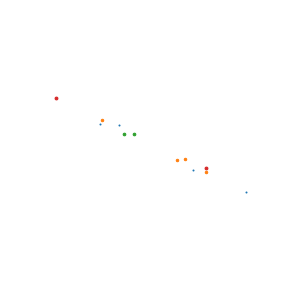

0.0


In [52]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg
import matplotlib.image as img
from matplotlib.cm import get_cmap

n_colors = 10
cmap = get_cmap('tab10')
unique = np.unique(raw_data['z'])
idxs = np.arange(n_colors)
lookup_table = np.zeros(len(raw_data['z']))
lookup_table[unique] += (idxs[:len(unique)] / float(n_colors)) + 0.5 / float(n_colors)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_axis_off()

for position, z in zip(positions, raw_data['z']):
    c = cmap(lookup_table[int(z)])
    print(c)
    ax.scatter(*(position), marker='o', color=cmap(lookup_table[int(z)]), s=int(z))

fig.tight_layout(pad=0)
ax.margins(0)
plt.savefig('tmp.png')
plt.show()
arr1 = img.imread('tmp.png') * 255

canvas = FigureCanvasAgg(fig)
canvas.draw()
buf = canvas.buffer_rgba()
arr2 = np.asarray(buf)

print(np.mean(np.abs(arr2-arr1)))
    


# for z, position in zip(data['z'], positions):
#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')
#     ax.set_axis_off()
#     ax.scatter(*(positions[:, i] for i in range(3)), marker='o')
#     fig.tight_layout(pad=0)
#     ax.margins(0)
#     plt.savefig('tmp.png')
#     arr1 = img.imread('tmp.png') * 255

#     canvas = FigureCanvasAgg(fig)
#     canvas.draw()
#     buf = canvas.buffer_rgba()
#     arr2 = np.asarray(buf)

#     print(np.mean(np.abs(arr2-arr1)))

# canvas.draw()
# buf = canvas.buffer_rgba()
# # convert to a NumPy array
# X = np.asarray(buf)
# fig.canvas.draw()
# canvas = FigureCanvas(fig)
# canvas.draw()       # draw the canvas, cache the renderer
# image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')





In [25]:
print(arr2)

[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]


In [14]:
atoms = read(uracil_xyz)
view(atoms, viewer='x3d')  # x3d for jupyter notebook
write('uracil.png', atoms)


NameError: name 'uracil_xyz' is not defined

None


In [18]:
ngl.NGLDisplay(uracil, xsize=100, ysize=100)

ModuleNotFoundError: No module named 'nglview'

In [ ]:
from ase import Atoms
d = 2.9
L = 10.0
wire = Atoms('Au',
             positions=[[0, L / 2, L / 2]],
             cell=[d, L, L],
             pbc=[1, 0, 0])
data, raw_data = load_data('/home/amawi/projects/mol-td/data/uracil_dft.npz')
